In [1]:
## Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Load and understand Dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)
print(boston.feature_names)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.data.shape

(506, 13)

In [6]:
# put the data into a pandas dataframe
bos = pd.DataFrame(boston.data)
bos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#build the features and target 
bos.columns = boston.feature_names
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Explore relationship between features and target

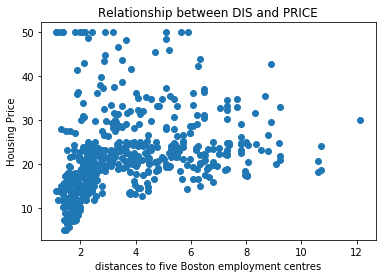

In [15]:
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("distances to five Boston employment centres")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and PRICE")
plt.show()

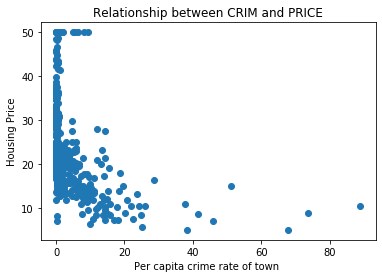

In [13]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate of town ")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and PRICE")
plt.show()

## Simple Linear Regression with 1 feature 

In [17]:
X = bos.DIS.values.reshape(-1,1)
y = bos.PRICE.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
lm = LinearRegression()
#training the algorithm
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#to get the intercept and slope
print(lm.intercept_)
print(lm.coef_)

[17.79254823]
[[1.17111283]]


In [21]:
#making predictions
y_pred = lm.predict(X_test)

In [25]:
#compare the actual and predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,12.0,20.252705
1,15.0,19.334084
2,22.4,22.070155
3,22.2,26.254424
4,21.7,20.726420
...,...,...
97,26.4,24.223949
98,19.7,21.070025
99,18.9,25.512641
100,18.0,19.915190


### Visualise predictions 

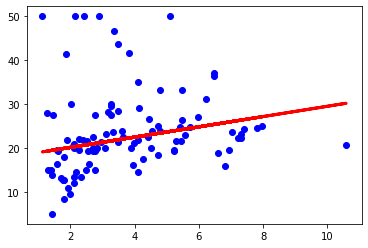

In [27]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.show()

### Evaluating the algorithm

In [28]:
print("Mean Square Error", metrics.mean_squared_error(y_test, y_pred))

Mean Square Error 88.57902459907055


## Linear Regression with multiple variables

In [33]:
X = bos.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [36]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(lm.coef_)

[[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
  -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
   2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
  -4.92792725e-01]]


In [41]:
#make predictions
y_pred = lm.predict(X_test)

In [42]:
df = pd.DataFrame({'Actual': y_test.flatten() , 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,22.6,24.889638
1,50.0,23.721411
2,23.0,29.364999
3,8.3,12.122386
4,21.2,21.443823
...,...,...
97,24.7,25.442171
98,14.1,15.571783
99,18.7,17.937195
100,28.1,25.305888


In [45]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 33.448979997676524
